In [23]:
import os

base_dir = 'FLAME2'

rgb_base_dir = os.path.join(base_dir, "254p RGB Images")
ir_base_dir = os.path.join(base_dir, "254p Thermal Images")

rgb_list = [os.path.join(rgb_base_dir, i) for i in os.listdir(rgb_base_dir) if i.endswith(".jpg")]
ir_list = [os.path.join(ir_base_dir, i) for i in os.listdir(ir_base_dir) if i.endswith(".jpg")]

print("rgb_list paths: ", rgb_list[:4])
print("ir_list paths: ", ir_list[:4])
print("Number of rgb_list pairs: ", len(rgb_list))
print("Number of ir_list pairs: ", len(ir_list))

rgb_list paths:  ['FLAME2/254p RGB Images/254p RGB Frame (34931).jpg', 'FLAME2/254p RGB Images/254p RGB Frame (37193).jpg', 'FLAME2/254p RGB Images/254p RGB Frame (7423).jpg', 'FLAME2/254p RGB Images/254p RGB Frame (2417).jpg']
ir_list paths:  ['FLAME2/254p Thermal Images/254p Thermal Frame (48470).jpg', 'FLAME2/254p Thermal Images/254p Thermal Frame (50990).jpg', 'FLAME2/254p Thermal Images/254p Thermal Frame (27084).jpg', 'FLAME2/254p Thermal Images/254p Thermal Frame (22825).jpg']
Number of rgb_list pairs:  53451
Number of ir_list pairs:  53451


# Note:
I noticed that the file paths have these awkward words around the id of the image which makes them harder to sort and iterate through efficiently.

Lets make a key function which is applied to each path to get the numerical image id and sorting paths based on that.

In [25]:
import re
def get_id_from_path(path):
    base = os.path.basename(path)
    og_filename, extension = os.path.splitext(base)
    id = og_filename.split(" ")[-1]
    id = re.sub(r'[()]', '', id)
    return int(id)

rgb_list.sort(key=get_id_from_path)
ir_list.sort(key=get_id_from_path)

print("renamed_rgb_list:", rgb_list[:4])
print("renamed_ir_list:", ir_list[:4])

renamed_rgb_list: ['FLAME2/254p RGB Images/254p RGB Frame (1).jpg', 'FLAME2/254p RGB Images/254p RGB Frame (2).jpg', 'FLAME2/254p RGB Images/254p RGB Frame (3).jpg', 'FLAME2/254p RGB Images/254p RGB Frame (4).jpg']
renamed_ir_list: ['FLAME2/254p Thermal Images/254p Thermal Frame (1).jpg', 'FLAME2/254p Thermal Images/254p Thermal Frame (2).jpg', 'FLAME2/254p Thermal Images/254p Thermal Frame (3).jpg', 'FLAME2/254p Thermal Images/254p Thermal Frame (4).jpg']


In [ ]:
# The following defines how labels are assigned to the frame pairs
'''
FirstFrameNumber - LastFrameNumber Fire(Y/N)Smoke(Y/N)
Fire (Y/N) indicates whether or not there is fire visible in 254p RGB and/or 254p Thermal frame
Smoke (Y/N) indicates whether smoke fills >= 50% of the 254p RGB frame (visual estimate)

1	13700	NN
13701	14699	YY
14700	15980	YN
15981	19802	YY
19803	19899	YN
19900	27183	YY
27184	27514	YN
27515	31294	YY
31295	31509	YN
31510	33597	YY
33598	33929	YN
33930	36550	YY
36551	38030	YN
38031	38153	YY
38154	41642	YN
41642	45279	YY
45280	51206	YN
51207	52286	YY
52287	53451	YN
'''
label_dict_ = {
    "NN": (1, 13700),
    "YY": [(13701, 14699), (15981, 19802), (19900, 27183), (27515, 31294), (31510, 33597), (33930, 36550), (38031, 38153), (41642, 45279), (51207, 52286)],
    "YN": [(14700, 15980), (19803, 19899), (27184, 27514), (31295, 31509), (33598, 33929), (36551, 38030), (38154, 41642), (45280, 51206), (52287, 53451)],
}
# rewrite the label_dict so that we can easily lookup the label of a given frame based on the id
label_dict = {}
for key, value in label_dict_.items():
    if type(value) == tuple:
        for i in range(value[0], value[1]+1):
            label_dict[i] = key
    else:
        for i in value:
            for j in range(i[0], i[1]+1):
                label_dict[j] = key


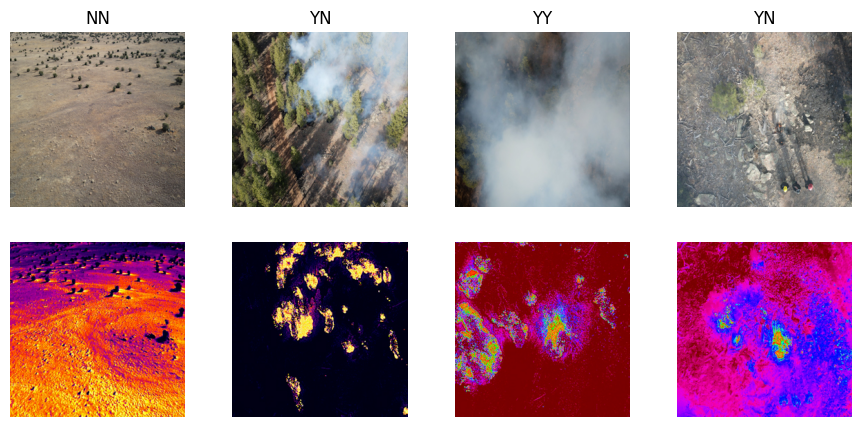

In [77]:
import random
import matplotlib.pyplot as plt
# Using matplotlib and subplots, visualize a grid of 10 random ir and rgb image pairs from the two lists of paths

def show_random_images(rgb_list, ir_list, num_images=4):
    fig, axes = plt.subplots(2, num_images, figsize=(11, 5))
    for i in range(num_images):
        rand_idx = random.randint(0, len(rgb_list))
        rgb_img = plt.imread(rgb_list[rand_idx])
        ir_img = plt.imread(ir_list[rand_idx])
        
        axes[0, i].imshow(rgb_img)
        axes[1, i].imshow(ir_img)
        
        axes[0, i].axis("off")
        axes[1, i].axis("off")
        
        id = get_id_from_path(rgb_list[rand_idx])
        label = label_dict[id]
        axes[0, i].set_title(f"{label}")
    plt.show()

show_random_images(rgb_list, ir_list)